**HAND WRITTEN DIGIT PREDICTION- CLASSIFICATION ANALYSIS**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualise the first 4 images.


**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

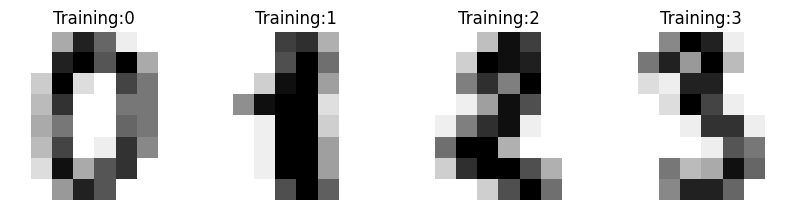

In [2]:
from sklearn.datasets import load_digits
df= load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training:%i" % label)

**Describe Data**

In [3]:
df.images.shape

(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
df.images[0].shape

(8, 8)

In [6]:
len(df.images)

1797

In [7]:
n_samples=len(df.images)
data=df.images.reshape((n_samples, -1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
data[0].shape

(64,)

In [9]:
data.shape

(1797, 64)

**Scaling Image Data**

In [10]:
data.min()

0.0

In [11]:
data.max()

16.0

In [13]:
data= data/16
data.min()

0.0

In [14]:
data.max()

0.0625

In [15]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

**Train Test Split Data**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data, df.target, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

**Predict Test Data**

In [18]:
y_pred=rf.predict(X_test)
y_pred

array([8, 2, 6, 0, 5, 5, 2, 1, 0, 1, 4, 8, 8, 3, 1, 0, 4, 9, 1, 0, 2, 9,
       3, 6, 8, 6, 5, 4, 0, 3, 8, 4, 4, 9, 6, 6, 7, 8, 9, 5, 2, 0, 4, 9,
       4, 6, 0, 8, 3, 2, 2, 5, 4, 4, 2, 9, 0, 3, 0, 5, 4, 0, 2, 5, 9, 3,
       5, 4, 6, 1, 7, 5, 2, 2, 1, 6, 8, 4, 9, 9, 2, 7, 1, 8, 3, 2, 0, 3,
       9, 8, 7, 4, 3, 9, 6, 0, 1, 5, 7, 6, 1, 4, 3, 3, 1, 9, 9, 5, 9, 3,
       1, 6, 7, 7, 7, 5, 4, 2, 6, 5, 7, 0, 8, 1, 6, 5, 5, 2, 1, 3, 7, 5,
       7, 0, 5, 5, 2, 2, 2, 4, 0, 9, 9, 7, 6, 3, 5, 0, 9, 5, 5, 0, 5, 0,
       1, 4, 4, 8, 0, 4, 6, 0, 8, 9, 4, 5, 2, 0, 8, 9, 0, 1, 1, 1, 4, 1,
       7, 1, 7, 7, 4, 1, 2, 4, 5, 7, 6, 7, 4, 1, 1, 7, 4, 5, 2, 8, 6, 5,
       4, 8, 1, 3, 4, 0, 1, 8, 5, 8, 3, 6, 0, 3, 6, 6, 2, 2, 8, 4, 3, 1,
       0, 6, 0, 5, 6, 6, 8, 7, 3, 0, 3, 3, 9, 6, 2, 6, 0, 6, 6, 0, 5, 4,
       6, 9, 3, 1, 5, 2, 8, 1, 9, 2, 8, 6, 8, 1, 6, 4, 7, 0, 5, 8, 9, 6,
       5, 8, 6, 0, 0, 3, 6, 2, 7, 6, 2, 7, 6, 4, 4, 8, 9, 3, 3, 1, 4, 3,
       3, 0, 7, 2, 3, 2, 0, 9, 9, 8, 2, 1, 8, 0, 0,

**Model Accuracy**

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)


array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 59]])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      1.00      0.97        53
           2       1.00      1.00      1.00        63
           3       0.98      0.94      0.96        49
           4       1.00      1.00      1.00        52
           5       0.96      0.96      0.96        55
           6       0.98      0.98      0.98        56
           7       0.95      1.00      0.98        40
           8       0.94      0.94      0.94        50
           9       0.98      0.94      0.96        63

    accuracy                           0.98       540
   macro avg       0.97      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

